In [22]:
from math import log

In [23]:
def calcShannonEnt (dataSet):
    numEntries = len(dataSet)
    labelCounts = {}
    for featVec in dataSet:
        currentLabel = featVec[-1]
        if currentLabel not in labelCounts.keys():
            labelCounts[currentLabel] = 0
            labelCounts[currentLabel] += 1
    shannonEnt = 0.0
    for key in labelCounts:
        prob = float(labelCounts[key])/numEntries
        shannonEnt -= prob * log(prob,2)
    return shannonEnt

In [39]:
def createDataSet():
    dataSet = [[1,1,'man'],
               [1,1,'man'],
               [1,0,'women'],
               [0,1,'women'],
               [0,1,'women']]
    labels = ['play game','go shopping']
    return dataSet, labels

In [44]:
myDat, labels = createDataSet()

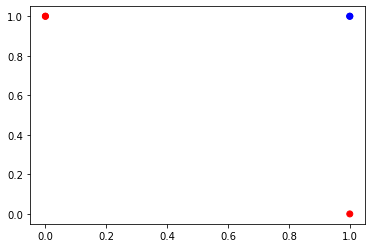

In [85]:
    import matplotlib
    import matplotlib.pyplot as plt

    fig, ax = plt.subplots()
    ax.scatter([exmple[0] for exmple in myDat],
               [exmple[1] for exmple in myDat],
               c=['blue' if example[2] == 'man' else 'red' for example in myDat])

In [27]:
def splitDataSet(dataSet, axis, value):
    retDataSet=[]
    for featVec in dataSet:
        if featVec[axis] == value:
            reduceFeatVec = featVec[0:axis]
            reduceFeatVec += featVec[axis+1:]
            retDataSet.append(reduceFeatVec)
    return retDataSet

In [28]:
def chooseBestFeatureToSplit(dataSet):
    numFeatures = len(dataSet[0]) - 1
    baseEntroy = calcShannonEnt(dataSet)
    bestinfoGain = 0.0
    bestFeature = -1
    for i in range(numFeatures):
        featList = [example[i] for example in dataSet]
        uniqueVals = set(featList)
        newEntropy = 0.0
        for value in uniqueVals:
            subDataSet = splitDataSet(dataSet, i, value)
            prob = len(subDataSet)/float(len(dataSet))
            newEntropy += prob * calcShannonEnt(subDataSet)
        infoGain = baseEntroy - newEntropy
        if (infoGain > bestFeature):
            bestinfoGain = infoGain
            bestFeature = i
    return bestFeature

In [29]:
import operator
def majorityCnt(classList):
    classCount = {}
    for vote in classList:
        if vote not in classCount.keys():
            classCounts[vote] = 0
        classCounts[vote] += 1
    sortedClassCount = sorted(classCount.items(),key=operator.itemgetter(1),reverse=True)
    return sortedClassCount[0][0]

In [30]:
def createTree(dataSet, labels):
    classList = [example[-1] for example in dataSet]
    if classList.count(classList[0]) == len(classList):
        return classList[0]
    if len (dataSet[0]) == 1:#特征值消耗完毕，只剩下分类名
        return majorityCnt(classList)
    bestFeat = chooseBestFeatureToSplit(dataSet)
    bestFeatLabel = labels[bestFeat]
    myTree = {bestFeatLabel:{}}
    del(labels[bestFeat])
    featValues = [example[bestFeat] for example in dataSet]
    uniqueVals = set(featValues)
    for value in uniqueVals:
        subLabels = labels[:]
        myTree[bestFeatLabel][value] = createTree(splitDataSet(dataSet, bestFeat, value), subLabels)
    return myTree

In [60]:
myDat, labels = createDataSet()
myTree = createTree(myDat,labels)
myTree

{'go shopping': {0: 'women', 1: {'play game': {0: 'women', 1: 'man'}}}}

In [89]:
import matplotlib.pyplot as plt

decisionNode = dict(boxstyle = "sawtooth", fc = "0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle = "<-")

def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy = parentPt,xycoords = "axes fraction", xytext = centerPt,
                           textcoords = "axes fraction", va = "center", ha = "center", bbox = nodeType, 
                            arrowprops = arrow_args)
def createPlot():
    fig = plt.figure(1, facecolor="white")
    fig.clf()
    createPlot.ax1 = plt.subplot(111, frameon = False)
    plotNode("a decision node", (0.5, 0.1), (0.1, 0.5), decisionNode)
    plotNode("a leaf node", (0.8, 0.1), (0.3, 0.8), leafNode)
    plt.show()

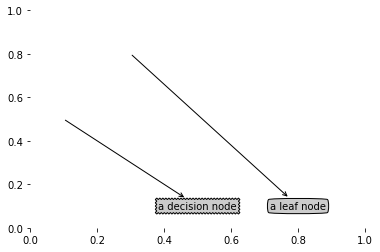

In [90]:
createPlot()

In [91]:
def getNumLeafs(myTree):
    numLeafs = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            numLeafs += getNumLeafs(secondDict[key])
        else: numLeafs += 1
    return numLeafs

def getTreeDepth(myTree):
    maxDepth = 0
    firstStr = list(myTree.keys())[0]
    secondDict = myTree[firstStr]
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            thisDepth = 1 + getTreeDepth(secondDict[key])
        else: thisDepth = 1
        if thisDepth > maxDepth: maxDepth = thisDepth
    return maxDepth


In [123]:
getNumLeafs(myTree)

3

In [124]:
getTreeDepth(myTree)

2

In [93]:
import matplotlib.pyplot as plt
#属性设置
decisionNode = dict(boxstyle = "sawtooth", fc = "0.8")
leafNode = dict(boxstyle="round4", fc="0.8")
arrow_args = dict(arrowstyle = "<-")
#绘制node节点，接收文本，当前节点位置，父节点位置，节点类型
def plotNode(nodeTxt, centerPt, parentPt, nodeType):
    createPlot.ax1.annotate(nodeTxt, xy = parentPt, xycoords = "axes fraction", xytext = centerPt,
                           textcoords = "axes fraction", va = "center", ha = "center", bbox = nodeType, 
                            arrowprops = arrow_args)

def plotMidText(cntrPt, parentPt, txtString):# 函数用于在父节点和子节点之间的中间位置绘制文本
    xMid = (parentPt[0] - cntrPt[0])/2.0 + cntrPt[0]
    yMid = (parentPt[1] - cntrPt[1])/2.0 + cntrPt[1]
    createPlot.ax1.text(xMid, yMid, txtString)

#函数是递归地绘制整个树的主要函数。它接受三个参数：myTree（表示当前子树的字典）、parentPt（父节点的坐标）、nodeTxt（当前节点的文本）。
def plotTree(myTree, parentPt, nodeTxt):#输入树，父节点坐标，节点信息
    numLeafs = getNumLeafs(myTree)
    depth = getTreeDepth(myTree)
    firstStr = list(myTree.keys())[0] #第一个节点名称
    cntrPt = (plotTree.xOff + (1.0 + float(numLeafs))/2.0/plotTree.totalW, plotTree.yOff) #根据当前xOff来找中间节点位置
    plotMidText(cntrPt, parentPt, nodeTxt)
    plotNode(firstStr, cntrPt, parentPt, decisionNode)
    secondDict = myTree[firstStr]
    plotTree.yOff = plotTree.yOff - 1.0/plotTree.totalD #y节点下降一个单位
    for key in secondDict.keys():
        if type(secondDict[key]).__name__ == 'dict':
            plotTree(secondDict[key], cntrPt, str(key))
        else:
            plotTree.xOff = plotTree.xOff + 1.0/plotTree.totalW
            plotNode(secondDict[key], (plotTree.xOff, plotTree.yOff), cntrPt, leafNode)
            plotMidText((plotTree.xOff, plotTree.yOff),cntrPt, str(key))
    plotTree.yOff = plotTree.yOff + 1.0/plotTree.totalD
def createPlot(inTree):#函数用于创建画布并初始化绘图参数
    fig = plt.figure(1, facecolor="white")#创建一个白色背景的图形
    fig.clf()
    axprops = dict(xticks = [], yticks=[])#定义 axprops 字典，用于设置坐标轴属性。
    createPlot.ax1 = plt.subplot(111, frameon = False, **axprops)#使用 plt.subplot() 方法创建子图，想怎么加怎么加。
    plotTree.totalW = float(getNumLeafs(inTree))#计算叶子个数，用来设置图的总宽
    plotTree.totalD = float(getTreeDepth(inTree))#计算深度，计算树的总深度
    plotTree.xOff = -0.5/plotTree.totalW
    plotTree.yOff = 1.0
    plotTree(inTree, (0.5,1.0), '')#第一个把父节点是为空名，其实可以理解成inTree为子树，而这子树的父节点为Null(0.5,1.0)
    plt.show()

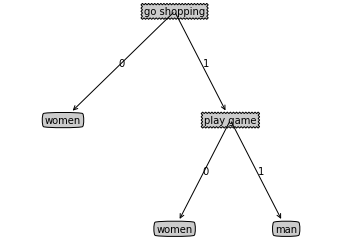

In [94]:
createPlot(myTree)

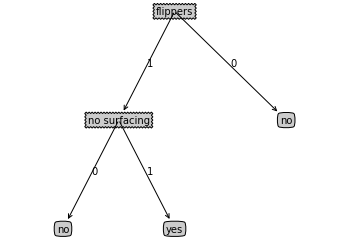

In [142]:
myTree2 = {'flippers': {1: {'no surfacing': {0: 'no', 1: 'yes'}},0: 'no'}}
createPlot(myTree2)

In [150]:
def classify(inputTree, featLabels, testVec):
    firstStr = list(inputTree.keys())[0]
    secondDict = inputTree[firstStr]
    featIndex = featLabels.index(firstStr)
    for key in secondDict.keys():
        if testVec[featIndex] == key:
            if type(secondDict[key]).__name__ == 'dict':
                classLabel = classify(secondDict[key], featLabels, testVec)
            else: classLabel = secondDict[key]
    return classLabel

In [153]:
myDat, labels = createDataSet()
classify(myTree, labels, [1,1])

'yes'

In [170]:
def storeTree(inputTree, filename):
    import pickle
    fw = open(filename, "wb")
    pickle.dump(inputTree,fw)
    fw.close()

def grabTree(filename):
    import pickle
    fr = open(filename,'rb')
    return pickle.load(fr)
# open函数不加b会导致->TypeError:must be str, not bytes
# 原因为：Python3给open函数添加了名为encoding的新参数，而这个新参数的默认值却是‘utf-8’。
#这样在文件句柄上进行read和write操作时，系统就要求开发者必须传入包含Unicode字符的实例，
#而不接受包含二进制数据的bytes实例。
#解决方法：使用二进制写入模式（‘wb’）来开启待操作文件，而不能像原来那样，采用字符写入模式（‘w’）

In [171]:
storeTree(myTree, 'this_is_a_tree.txt')
grabTree('this_is_a_tree.txt')

{'flippers': {0: 'no', 1: {'no surfacing': {0: 'no', 1: 'yes'}}}}

In [172]:
#使用决策树预测隐形眼镜类型

In [138]:
fr = open('lenses.txt')

In [139]:
lenses = [inst.strip().split('\t') for inst in fr.readlines()]

In [140]:
lenses

[['young', 'myope', 'no', 'reduced', 'no lenses'],
 ['young', 'myope', 'no', 'normal', 'soft'],
 ['young', 'myope', 'yes', 'reduced', 'no lenses'],
 ['young', 'myope', 'yes', 'normal', 'hard'],
 ['young', 'hyper', 'no', 'reduced', 'no lenses'],
 ['young', 'hyper', 'no', 'normal', 'soft'],
 ['young', 'hyper', 'yes', 'reduced', 'no lenses'],
 ['young', 'hyper', 'yes', 'normal', 'hard'],
 ['pre', 'myope', 'no', 'reduced', 'no lenses'],
 ['pre', 'myope', 'no', 'normal', 'soft'],
 ['pre', 'myope', 'yes', 'reduced', 'no lenses'],
 ['pre', 'myope', 'yes', 'normal', 'hard'],
 ['pre', 'hyper', 'no', 'reduced', 'no lenses'],
 ['pre', 'hyper', 'no', 'normal', 'soft'],
 ['pre', 'hyper', 'yes', 'reduced', 'no lenses'],
 ['pre', 'hyper', 'yes', 'normal', 'no lenses'],
 ['presbyopic', 'myope', 'no', 'reduced', 'no lenses'],
 ['presbyopic', 'myope', 'no', 'normal', 'no lenses'],
 ['presbyopic', 'myope', 'yes', 'reduced', 'no lenses'],
 ['presbyopic', 'myope', 'yes', 'normal', 'hard'],
 ['presbyopic', 

In [141]:
lensesLabels = ['age', 'prescript', 'astigmatic', 'tearRate']

In [142]:
lensesTree = createTree(lenses, lensesLabels)

In [143]:
lensesTree

{'age': {'presbyopic': {'astigmatic': {'no': {'tearRate': {'normal': {'prescript': {'myope': 'no lenses',
        'hyper': 'soft'}},
      'reduced': 'no lenses'}},
    'yes': {'tearRate': {'normal': {'prescript': {'myope': 'hard',
        'hyper': 'no lenses'}},
      'reduced': 'no lenses'}}}},
  'young': {'astigmatic': {'no': {'tearRate': {'normal': 'soft',
      'reduced': 'no lenses'}},
    'yes': {'tearRate': {'normal': 'hard', 'reduced': 'no lenses'}}}},
  'pre': {'astigmatic': {'no': {'tearRate': {'normal': 'soft',
      'reduced': 'no lenses'}},
    'yes': {'tearRate': {'normal': {'prescript': {'myope': 'hard',
        'hyper': 'no lenses'}},
      'reduced': 'no lenses'}}}}}}

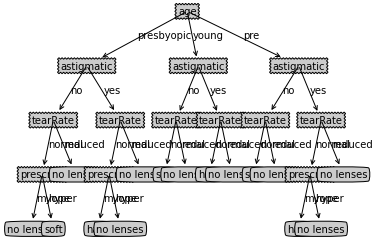

In [144]:
createPlot(lensesTree)